In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import dill

from tqdm import tqdm
from itertools import chain
from sklearn.manifold import TSNE
from collections import defaultdict, Counter

from sklearn.model_selection import GroupKFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve

from f723.tools.show.classification import plot_precision_recall_curve
from f723.tools.models.application import ClassificationResult

Посмотрим на TP пары и попробуем выделить среди них самые большие интерпретируемые классы.

In [2]:
with open('description.pickle', 'rb') as infile:
    description = np.array(pickle.load(infile))

noncanonical_features = np.load('noncanonical_features.npy')
noncanonical_tp = np.load('noncanonical_tp.npy')
noncanonical_lw = np.load('noncanonical_lw.npy')

In [3]:
keys = list(set(noncanonical_lw))
true_positive_counter = Counter(noncanonical_lw[noncanonical_tp])
false_negative_counter = Counter(noncanonical_lw[~noncanonical_tp])

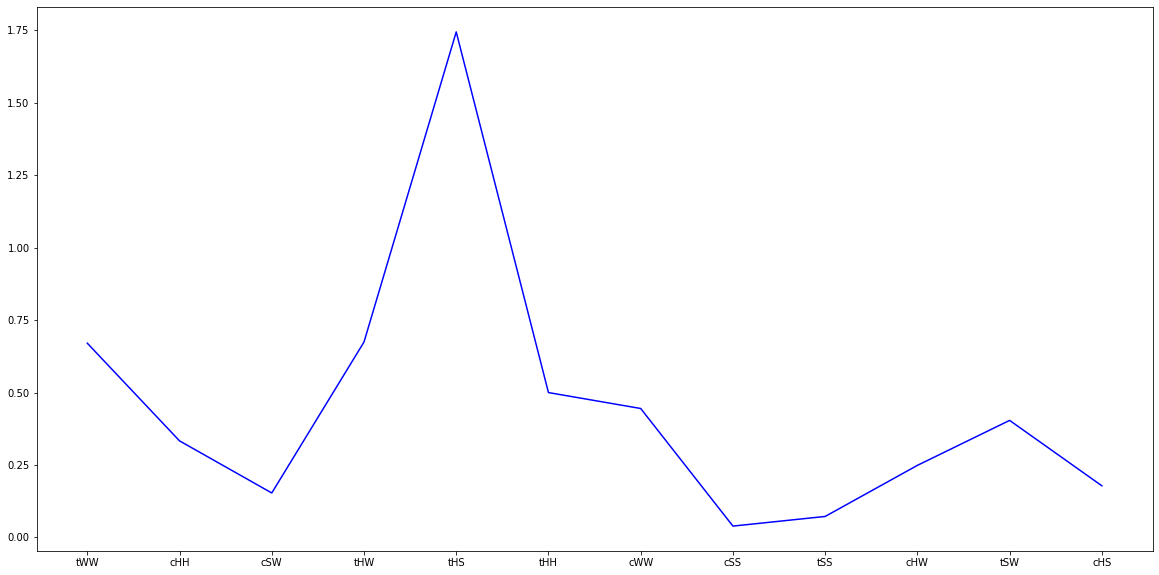

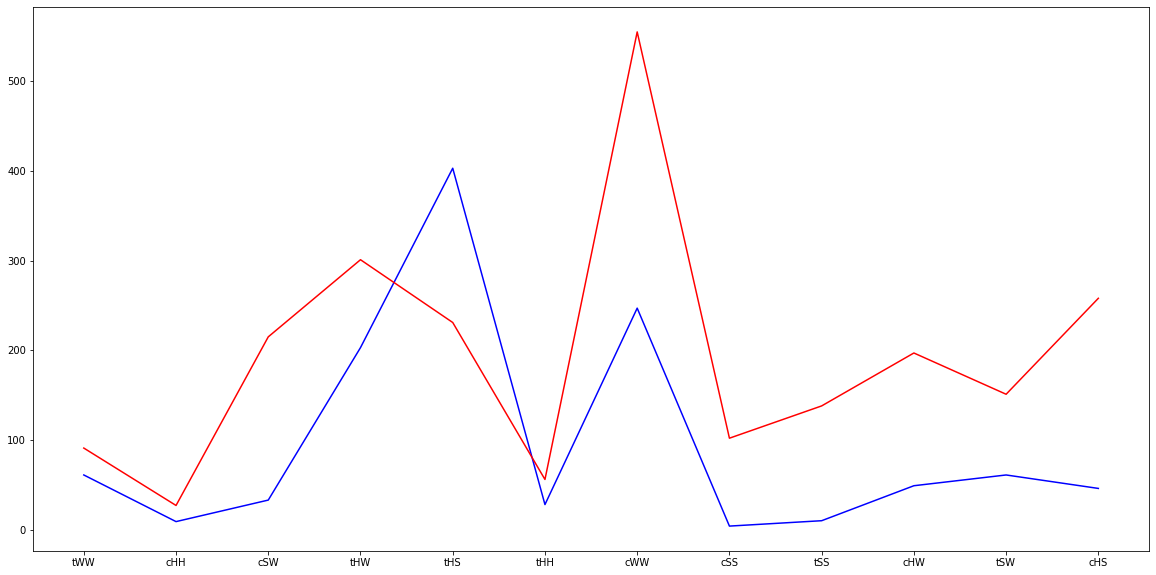

In [4]:
xs = np.arange(len(keys))
true_positive_num = np.array([true_positive_counter[k] for k in keys])
false_negative_num = np.array([false_negative_counter[k] for k in keys])

plt.figure(figsize=(20, 10))
plt.xticks(ticks=xs, labels=keys)
plt.plot(xs, true_positive_num / false_negative_num, c='b')

plt.figure(figsize=(20, 10))
plt.xticks(ticks=xs, labels=keys)
plt.plot(xs, true_positive_num, c='b')
plt.plot(xs, false_negative_num, c='r')

In [5]:
major_tp = {'tHW', 'tHS', 'cWW'}
minor_tp = set(keys) - major_tp

sum([true_positive_counter[k] for k in major_tp]), sum([true_positive_counter[k] for k in minor_tp])

(853, 301)

Видим, что на tHW, tHS, cWW приходится около 75% всех TP, проанализируем эти 3 класса. Только их потому что во-первых трудоемко, во-вторых, потому что в остальных классах очень мало данных.

In [6]:
len(major_tp), len(minor_tp)

(3, 9)

Выделим индексы фичей нуклеотидов пары (ведь в фичах у нас ещё и их соседи) + relation-фичи

In [8]:
features_index, features_description = zip(*[(i, item) for i, item in enumerate(description) 
                                             if (item[1] == 0) 
                                             or item[0] == 'relation'])

Для каждого класса посмотрим на  
1) tSNE фичей пар в этом классе  
2) среднее фичей в этом классе  




Stats for key: tHW


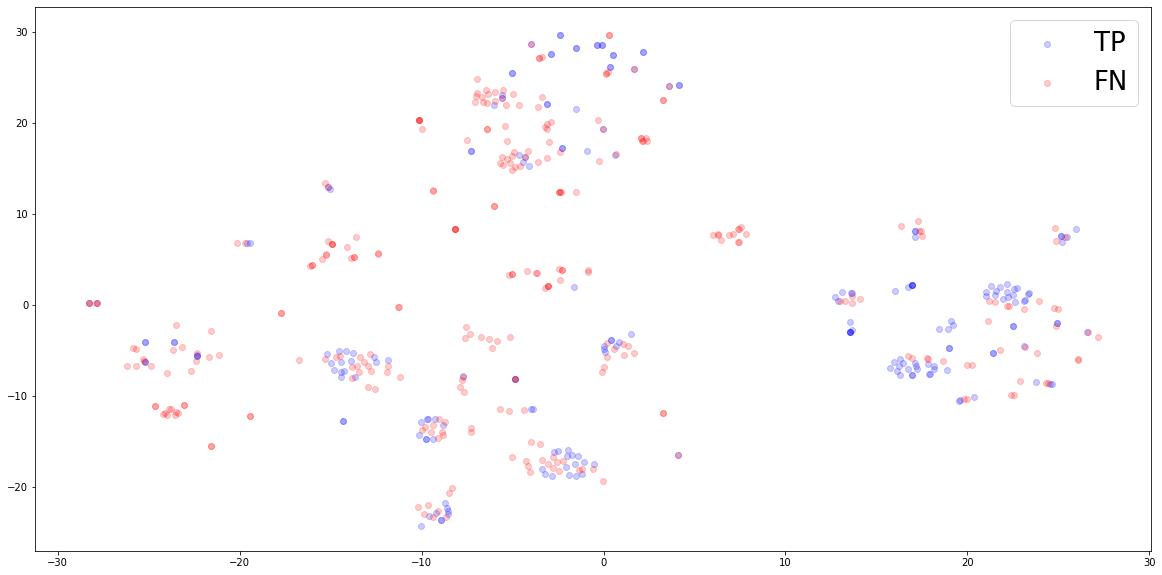

TP FEATURES

('left', 0, ('nucleotide', 'is_dummy')) 1.0
('left', 0, ('secondary_structure', 'BC')) 0.009852216748768473
('left', 0, ('secondary_structure', 'BI')) 0.0
('left', 0, ('secondary_structure', 'BP')) 0.009852216748768473
('left', 0, ('secondary_structure', 'HC')) 0.39901477832512317
('left', 0, ('secondary_structure', 'HI')) 0.0
('left', 0, ('secondary_structure', 'HP')) 0.059113300492610835
('left', 0, ('secondary_structure', 'IC')) 0.32019704433497537
('left', 0, ('secondary_structure', 'II')) 0.0
('left', 0, ('secondary_structure', 'IP')) 0.0
('left', 0, ('secondary_structure', 'JC')) 0.18719211822660098
('left', 0, ('secondary_structure', 'JI')) 0.0
('left', 0, ('secondary_structure', 'JP')) 0.12807881773399016
('left', 0, ('secondary_structure', 'S')) 0.014778325123152709
('left', 0, ('base', 'a')) 0.46798029556650245
('left', 0, ('base', 'u')) 0.3251231527093596
('left', 0, ('base', 'g')) 0.10837438423645321
('left', 0, ('base', 'c')) 0.06403940886699508
('left', 0, ('

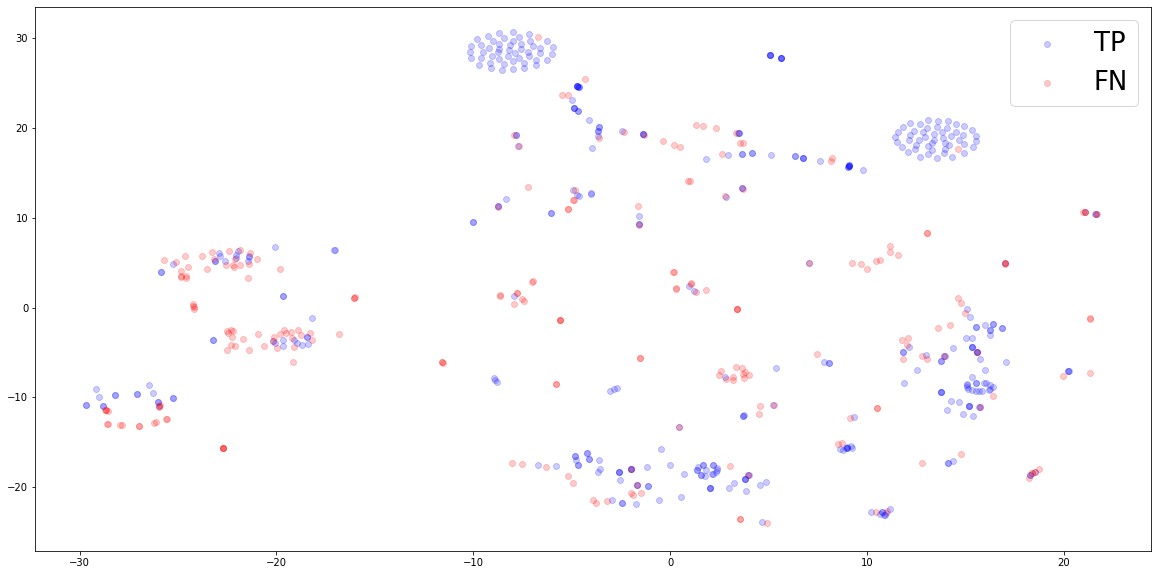

TP FEATURES

('left', 0, ('nucleotide', 'is_dummy')) 1.0
('left', 0, ('secondary_structure', 'BC')) 0.0
('left', 0, ('secondary_structure', 'BI')) 0.0
('left', 0, ('secondary_structure', 'BP')) 0.0
('left', 0, ('secondary_structure', 'HC')) 0.4143920595533499
('left', 0, ('secondary_structure', 'HI')) 0.0
('left', 0, ('secondary_structure', 'HP')) 0.022332506203473945
('left', 0, ('secondary_structure', 'IC')) 0.4218362282878412
('left', 0, ('secondary_structure', 'II')) 0.0024813895781637717
('left', 0, ('secondary_structure', 'IP')) 0.017369727047146403
('left', 0, ('secondary_structure', 'JC')) 0.13399503722084366
('left', 0, ('secondary_structure', 'JI')) 0.009925558312655087
('left', 0, ('secondary_structure', 'JP')) 0.04714640198511166
('left', 0, ('secondary_structure', 'S')) 0.0024813895781637717
('left', 0, ('base', 'a')) 0.47642679900744417
('left', 0, ('base', 'u')) 0.017369727047146403
('left', 0, ('base', 'g')) 0.46898263027295284
('left', 0, ('base', 'c')) 0.0347394540942

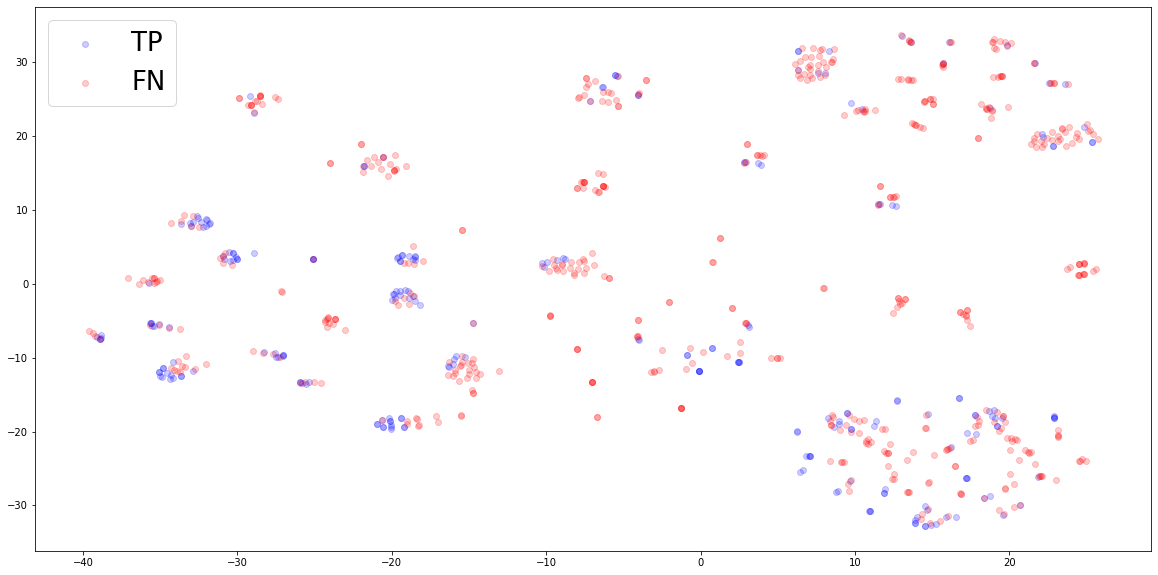

TP FEATURES

('left', 0, ('nucleotide', 'is_dummy')) 1.0
('left', 0, ('secondary_structure', 'BC')) 0.0
('left', 0, ('secondary_structure', 'BI')) 0.0
('left', 0, ('secondary_structure', 'BP')) 0.0
('left', 0, ('secondary_structure', 'HC')) 0.32388663967611336
('left', 0, ('secondary_structure', 'HI')) 0.0
('left', 0, ('secondary_structure', 'HP')) 0.024291497975708502
('left', 0, ('secondary_structure', 'IC')) 0.5020242914979757
('left', 0, ('secondary_structure', 'II')) 0.0
('left', 0, ('secondary_structure', 'IP')) 0.008097165991902834
('left', 0, ('secondary_structure', 'JC')) 0.12550607287449392
('left', 0, ('secondary_structure', 'JI')) 0.008097165991902834
('left', 0, ('secondary_structure', 'JP')) 0.044534412955465584
('left', 0, ('secondary_structure', 'S')) 0.0
('left', 0, ('base', 'a')) 0.17813765182186234
('left', 0, ('base', 'u')) 0.21052631578947367
('left', 0, ('base', 'g')) 0.26720647773279355
('left', 0, ('base', 'c')) 0.32793522267206476
('left', 0, ('base', 'rare')) 

In [9]:
noncanonical_transformed = {}

for key in major_tp:
    print('\n\n\nStats for key: {}'.format(key))

    key_mask = noncanonical_lw == key
    key_tp = noncanonical_tp[key_mask]
    
    key_features = noncanonical_features[key_mask][:, features_index]
    tsne_key_features = key_features[:, key_features.std(axis=0) > 0]
    
    transformed = TSNE().fit_transform((tsne_key_features - tsne_key_features.mean(axis=0)) / \
                                       tsne_key_features.std(axis=0))
    noncanonical_transformed[key] = transformed
    
    plt.figure(figsize=(20, 10))

    plt.scatter(transformed[key_tp, 0], transformed[key_tp, 1], c='b', alpha=.2, label='TP')
    plt.scatter(transformed[~key_tp, 0], transformed[~key_tp, 1], c='r', alpha=.2, label='FN')
    
    plt.legend(fontsize=26)
    plt.show()
    
    print('TP FEATURES\n')

    for mean, descr in zip(key_features[key_tp].mean(axis=0), features_description):
        print(descr, mean)

    print('\n\nTP - FN FEATURES\n')

    features_diff = key_features[key_tp].mean(axis=0) - key_features[~key_tp].mean(axis=0)

    for mean, descr in zip(features_diff, features_description):
        print(descr, mean)

Ожидаемо, хорошо кластера по цветам выделились для tHS, хуже для tHW, ещё хуже для cWW. Также заметим что на картинках все кластера как бы парные. Это оттого, что датасет у нас содержит для каждой пары 2 строки фичей: прямой и отзеркаленый.


Теперь руками посмотрим на самые толстые кластера. Порядок действий такой:  
1) Берем пары внутри явного TP-кластера  
2) Смотрим на среднее фичей внутри кластера, выделяем сет фичей, которые в нем почти всегда равны 1, получаем некоторый признак A, например "AG пары, лежащие внутри одного HC вторичной структуры"  
3) Берем весь изначальный датасет, проводим классификацию "неканонические пары, отвечающие признаку A" против остальных пар (то есть неканонические пары, не отвечающие признаку A + случайные пары, не входящие ни во вторичную структуру, ни в множество неканонических пар)  
4) Делаем вывод, что мы умеем классифицировать пары, обладающие признаком A лучше на такую-то величину  

In [10]:
def examine_square(key, up, bottom, left, right):
    key_mask = noncanonical_lw == key
    key_tp = noncanonical_tp[key_mask]
    key_features = noncanonical_features[key_mask][:, features_index]
    
    transformed = noncanonical_transformed[key]
    square_mask = (transformed[:, 1] < up) & \
                  (transformed[:, 1] > bottom) & \
                  (transformed[:, 0] < right) & \
                  (transformed[:, 0] > left)
    
    plt.figure(figsize=(20, 10))

    plt.scatter(transformed[key_tp & square_mask, 0], transformed[key_tp & square_mask, 1], 
                c='b', alpha=.2, label='TP')
    plt.scatter(transformed[~key_tp & square_mask, 0], transformed[~key_tp & square_mask, 1], 
                c='r', alpha=.2, label='FN')
    plt.scatter(transformed[~square_mask, 0], transformed[~square_mask, 1], 
                c='k', alpha=.1, label='OUT')
    
    plt.legend(fontsize=26)
    plt.show()
    
    for mean, descr in zip(key_features[square_mask & key_tp].mean(axis=0), features_description):
        print(descr, mean)
    
    nts = [''.join([descr[2][1] for descr, feature in zip(features_description, row) 
                    if descr[1] == 0 and descr[2][0] == 'base' and descr[2][1] != 'rare' and feature == 1])
           for row in key_features[square_mask & key_tp]]
    print(Counter(nts).most_common())

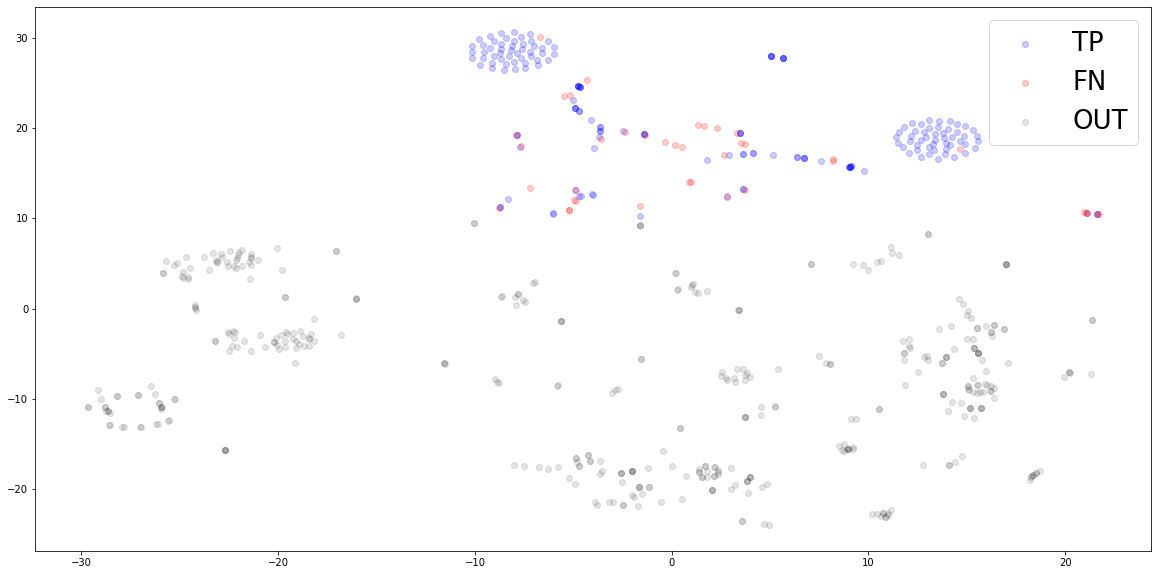

('left', 0, ('nucleotide', 'is_dummy')) 1.0
('left', 0, ('secondary_structure', 'BC')) 0.0
('left', 0, ('secondary_structure', 'BI')) 0.0
('left', 0, ('secondary_structure', 'BP')) 0.0
('left', 0, ('secondary_structure', 'HC')) 0.9597701149425287
('left', 0, ('secondary_structure', 'HI')) 0.0
('left', 0, ('secondary_structure', 'HP')) 0.0
('left', 0, ('secondary_structure', 'IC')) 0.011494252873563218
('left', 0, ('secondary_structure', 'II')) 0.0
('left', 0, ('secondary_structure', 'IP')) 0.0
('left', 0, ('secondary_structure', 'JC')) 0.011494252873563218
('left', 0, ('secondary_structure', 'JI')) 0.017241379310344827
('left', 0, ('secondary_structure', 'JP')) 0.0
('left', 0, ('secondary_structure', 'S')) 0.0
('left', 0, ('base', 'a')) 0.4367816091954023
('left', 0, ('base', 'u')) 0.017241379310344827
('left', 0, ('base', 'g')) 0.47701149425287354
('left', 0, ('base', 'c')) 0.06896551724137931
('left', 0, ('base', 'rare')) 1.0
('left', 0, ('fragment', 'length')) 6.218390804597701
('le

In [11]:
examine_square('tHS', 100, 10, -100, 100)

Видим, что в данном квадрате -- AG пары, находящиеся в одной и той же HC структуре, добавим запись в conditions. Для этого нам понадобится словарь dm -- из названий фичей в их индексы, чтобы запись была читабельной.

In [23]:
conditions = []
dm = dict(zip(features_description, features_index))

In [24]:
conditions.append((
    'tHS AG same-HC', 
    lambda f: \
        (f[:, dm[('relation', 'SM')]] == 1) & \
        (f[:, dm[('right', 0, ('secondary_structure', 'HC'))]] == 1) & \
        (f[:, dm[('left', 0, ('secondary_structure', 'HC'))]] == 1) & \
        ((f[:, dm[('left', 0, ('base', 'a'))]] == 1) & (f[:, dm[('right', 0, ('base', 'g'))]] == 1) | \
         (f[:, dm[('left', 0, ('base', 'g'))]] == 1) & (f[:, dm[('right', 0, ('base', 'a'))]] == 1))
))

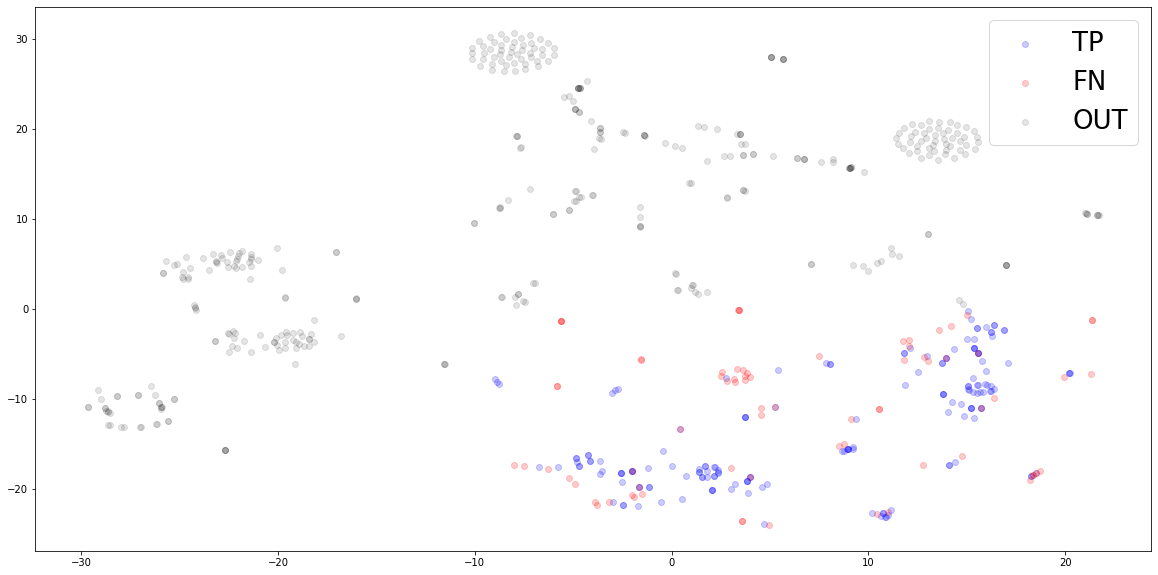

('left', 0, ('nucleotide', 'is_dummy')) 1.0
('left', 0, ('secondary_structure', 'BC')) 0.0
('left', 0, ('secondary_structure', 'BI')) 0.0
('left', 0, ('secondary_structure', 'BP')) 0.0
('left', 0, ('secondary_structure', 'HC')) 0.0
('left', 0, ('secondary_structure', 'HI')) 0.0
('left', 0, ('secondary_structure', 'HP')) 0.04093567251461988
('left', 0, ('secondary_structure', 'IC')) 0.9707602339181286
('left', 0, ('secondary_structure', 'II')) 0.0
('left', 0, ('secondary_structure', 'IP')) 0.04093567251461988
('left', 0, ('secondary_structure', 'JC')) 0.0
('left', 0, ('secondary_structure', 'JI')) 0.0
('left', 0, ('secondary_structure', 'JP')) 0.011695906432748537
('left', 0, ('secondary_structure', 'S')) 0.0
('left', 0, ('base', 'a')) 0.4853801169590643
('left', 0, ('base', 'u')) 0.017543859649122806
('left', 0, ('base', 'g')) 0.49122807017543857
('left', 0, ('base', 'c')) 0.0
('left', 0, ('base', 'rare')) 0.9941520467836257
('left', 0, ('fragment', 'length')) 3.8128654970760234
('left

In [14]:
examine_square('tHS', 0, -100, -10, 100)

In [25]:
conditions.append((
    'tHS AG same-IC', 
    lambda f: \
        (f[:, dm[('relation', 'SM')]] == 1) & \
        (f[:, dm[('right', 0, ('secondary_structure', 'IC'))]] == 1) & \
        (f[:, dm[('left', 0, ('secondary_structure', 'IC'))]] == 1) & \
        ((f[:, dm[('left', 0, ('base', 'a'))]] == 1) & (f[:, dm[('right', 0, ('base', 'g'))]] == 1) | \
         (f[:, dm[('left', 0, ('base', 'g'))]] == 1) & (f[:, dm[('right', 0, ('base', 'a'))]] == 1))
))

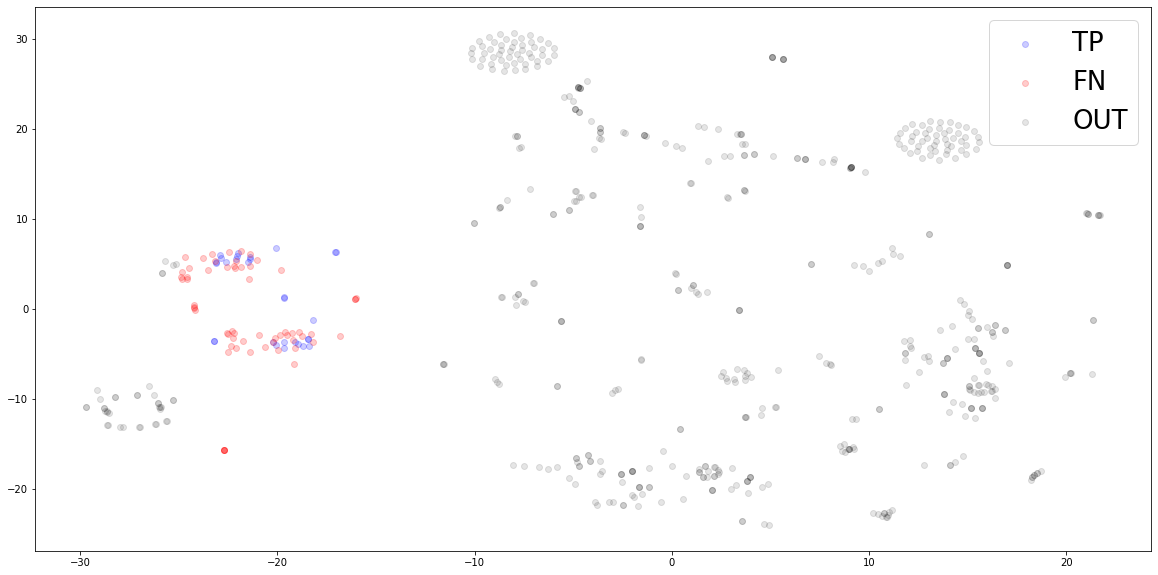

('left', 0, ('nucleotide', 'is_dummy')) 1.0
('left', 0, ('secondary_structure', 'BC')) 0.0
('left', 0, ('secondary_structure', 'BI')) 0.0
('left', 0, ('secondary_structure', 'BP')) 0.0
('left', 0, ('secondary_structure', 'HC')) 0.0
('left', 0, ('secondary_structure', 'HI')) 0.0
('left', 0, ('secondary_structure', 'HP')) 0.034482758620689655
('left', 0, ('secondary_structure', 'IC')) 0.0
('left', 0, ('secondary_structure', 'II')) 0.0
('left', 0, ('secondary_structure', 'IP')) 0.0
('left', 0, ('secondary_structure', 'JC')) 1.0
('left', 0, ('secondary_structure', 'JI')) 0.0
('left', 0, ('secondary_structure', 'JP')) 0.0
('left', 0, ('secondary_structure', 'S')) 0.0
('left', 0, ('base', 'a')) 0.5517241379310345
('left', 0, ('base', 'u')) 0.0
('left', 0, ('base', 'g')) 0.4482758620689655
('left', 0, ('base', 'c')) 0.0
('left', 0, ('base', 'rare')) 1.0
('left', 0, ('fragment', 'length')) 4.103448275862069
('left', 0, ('fragment', 'index')) 1.4827586206896552
('right', 0, ('nucleotide', 'is_d

In [17]:
examine_square('tHS', 100, -100, -25, -15)

In [26]:
conditions.append((
    'tHS AG same-JC', 
    lambda f: \
        (f[:, dm[('relation', 'SM')]] == 1) & \
        (f[:, dm[('right', 0, ('secondary_structure', 'JC'))]] == 1) & \
        (f[:, dm[('left', 0, ('secondary_structure', 'JC'))]] == 1) & \
        ((f[:, dm[('left', 0, ('base', 'a'))]] == 1) & (f[:, dm[('right', 0, ('base', 'g'))]] == 1) | \
         (f[:, dm[('left', 0, ('base', 'g'))]] == 1) & (f[:, dm[('right', 0, ('base', 'a'))]] == 1))
))

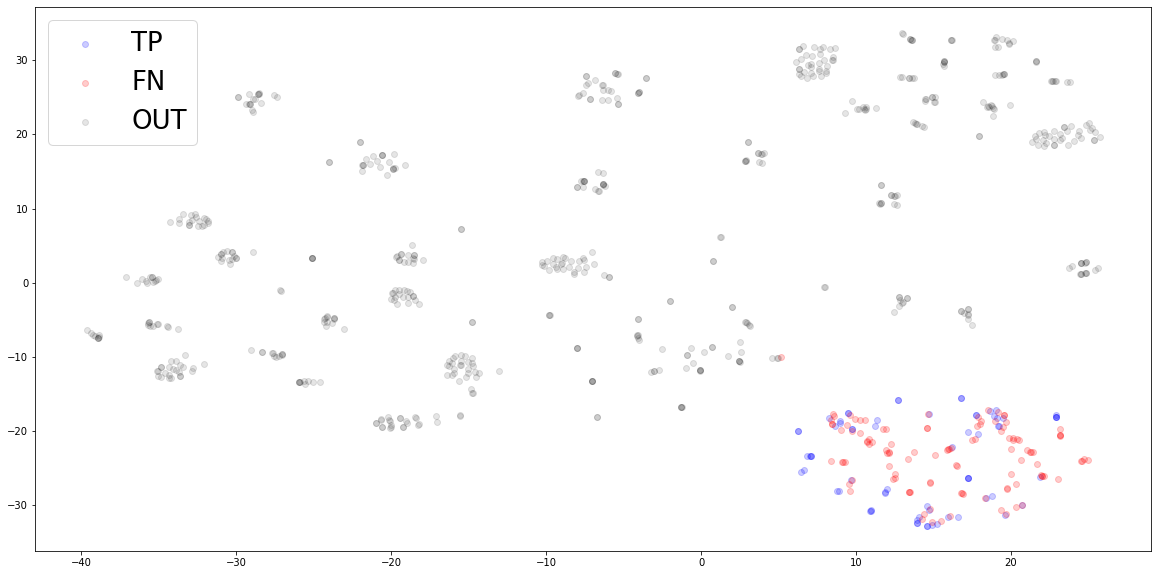

('left', 0, ('nucleotide', 'is_dummy')) 1.0
('left', 0, ('secondary_structure', 'BC')) 0.0
('left', 0, ('secondary_structure', 'BI')) 0.0
('left', 0, ('secondary_structure', 'BP')) 0.0
('left', 0, ('secondary_structure', 'HC')) 1.0
('left', 0, ('secondary_structure', 'HI')) 0.0
('left', 0, ('secondary_structure', 'HP')) 0.0
('left', 0, ('secondary_structure', 'IC')) 0.0
('left', 0, ('secondary_structure', 'II')) 0.0
('left', 0, ('secondary_structure', 'IP')) 0.0
('left', 0, ('secondary_structure', 'JC')) 0.0
('left', 0, ('secondary_structure', 'JI')) 0.0
('left', 0, ('secondary_structure', 'JP')) 0.0
('left', 0, ('secondary_structure', 'S')) 0.0
('left', 0, ('base', 'a')) 0.16176470588235295
('left', 0, ('base', 'u')) 0.27941176470588236
('left', 0, ('base', 'g')) 0.25
('left', 0, ('base', 'c')) 0.3088235294117647
('left', 0, ('base', 'rare')) 1.0
('left', 0, ('fragment', 'length')) 10.985294117647058
('left', 0, ('fragment', 'index')) 4.911764705882353
('right', 0, ('nucleotide', 'is_

In [20]:
examine_square('cWW', -10, -100, 5, 100)

In [27]:
conditions.append((
    'cWW UU/CG same-HC', 
    lambda f: \
        (f[:, dm[('relation', 'SM')]] == 1) & \
        (f[:, dm[('right', 0, ('secondary_structure', 'HC'))]] == 1) & \
        (f[:, dm[('left', 0, ('secondary_structure', 'HC'))]] == 1) & \
        ((f[:, dm[('left', 0, ('base', 'c'))]] == 1) & (f[:, dm[('right', 0, ('base', 'g'))]] == 1) | \
         (f[:, dm[('left', 0, ('base', 'g'))]] == 1) & (f[:, dm[('right', 0, ('base', 'c'))]] == 1) | \
         (f[:, dm[('left', 0, ('base', 'u'))]] == 1) & (f[:, dm[('right', 0, ('base', 'u'))]] == 1))
))

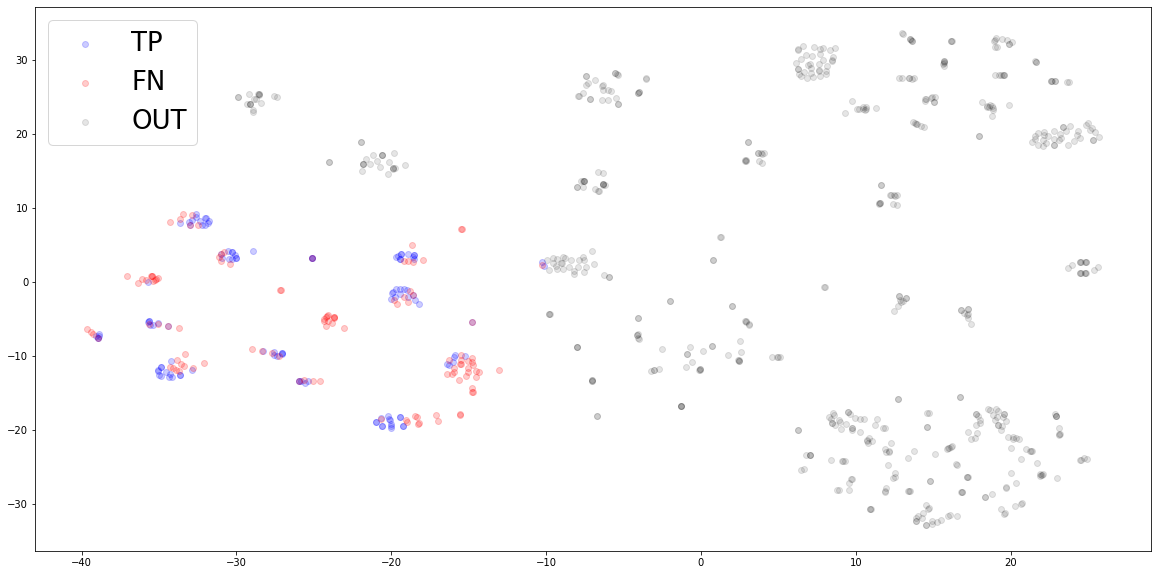

('left', 0, ('nucleotide', 'is_dummy')) 1.0
('left', 0, ('secondary_structure', 'BC')) 0.0
('left', 0, ('secondary_structure', 'BI')) 0.0
('left', 0, ('secondary_structure', 'BP')) 0.0
('left', 0, ('secondary_structure', 'HC')) 0.0
('left', 0, ('secondary_structure', 'HI')) 0.0
('left', 0, ('secondary_structure', 'HP')) 0.0
('left', 0, ('secondary_structure', 'IC')) 1.0
('left', 0, ('secondary_structure', 'II')) 0.0
('left', 0, ('secondary_structure', 'IP')) 0.0
('left', 0, ('secondary_structure', 'JC')) 0.0
('left', 0, ('secondary_structure', 'JI')) 0.0
('left', 0, ('secondary_structure', 'JP')) 0.008771929824561403
('left', 0, ('secondary_structure', 'S')) 0.0
('left', 0, ('base', 'a')) 0.23684210526315788
('left', 0, ('base', 'u')) 0.23684210526315788
('left', 0, ('base', 'g')) 0.20175438596491227
('left', 0, ('base', 'c')) 0.32456140350877194
('left', 0, ('base', 'rare')) 1.0
('left', 0, ('fragment', 'length')) 2.9649122807017543
('left', 0, ('fragment', 'index')) 0.929824561403508

In [19]:
examine_square('cWW', 10, -100, -100, -10)

In [28]:
conditions.append((
    'cWW same-IC', 
    lambda f: \
        (f[:, dm[('relation', 'SM')]] == 1) & \
        (f[:, dm[('right', 0, ('secondary_structure', 'IC'))]] == 1) & \
        (f[:, dm[('left', 0, ('secondary_structure', 'IC'))]] == 1)
))

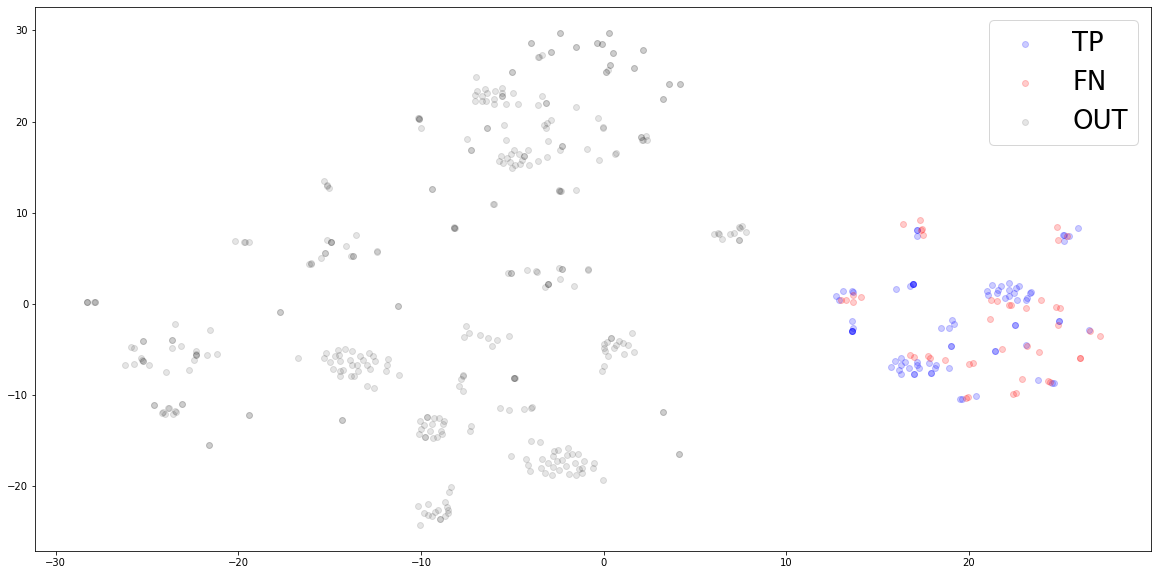

('left', 0, ('nucleotide', 'is_dummy')) 1.0
('left', 0, ('secondary_structure', 'BC')) 0.0
('left', 0, ('secondary_structure', 'BI')) 0.0
('left', 0, ('secondary_structure', 'BP')) 0.0
('left', 0, ('secondary_structure', 'HC')) 0.9878048780487805
('left', 0, ('secondary_structure', 'HI')) 0.0
('left', 0, ('secondary_structure', 'HP')) 0.0
('left', 0, ('secondary_structure', 'IC')) 0.0
('left', 0, ('secondary_structure', 'II')) 0.0
('left', 0, ('secondary_structure', 'IP')) 0.0
('left', 0, ('secondary_structure', 'JC')) 0.0
('left', 0, ('secondary_structure', 'JI')) 0.0
('left', 0, ('secondary_structure', 'JP')) 0.012195121951219513
('left', 0, ('secondary_structure', 'S')) 0.0
('left', 0, ('base', 'a')) 0.4268292682926829
('left', 0, ('base', 'u')) 0.32926829268292684
('left', 0, ('base', 'g')) 0.14634146341463414
('left', 0, ('base', 'c')) 0.036585365853658534
('left', 0, ('base', 'rare')) 0.9390243902439024
('left', 0, ('fragment', 'length')) 8.195121951219512
('left', 0, ('fragment'

In [21]:
examine_square('tHW', 100, -100, 10, 100)

In [29]:
conditions.append((
    'tHW AU same-HC', 
    lambda f: \
        (f[:, dm[('relation', 'SM')]] == 1) & \
        (f[:, dm[('right', 0, ('secondary_structure', 'HC'))]] == 1) & \
        (f[:, dm[('left', 0, ('secondary_structure', 'HC'))]] == 1) & \
        ((f[:, dm[('left', 0, ('base', 'a'))]] == 1) & (f[:, dm[('right', 0, ('base', 'u'))]] == 1) | \
         (f[:, dm[('left', 0, ('base', 'u'))]] == 1) & (f[:, dm[('right', 0, ('base', 'a'))]] == 1))
))

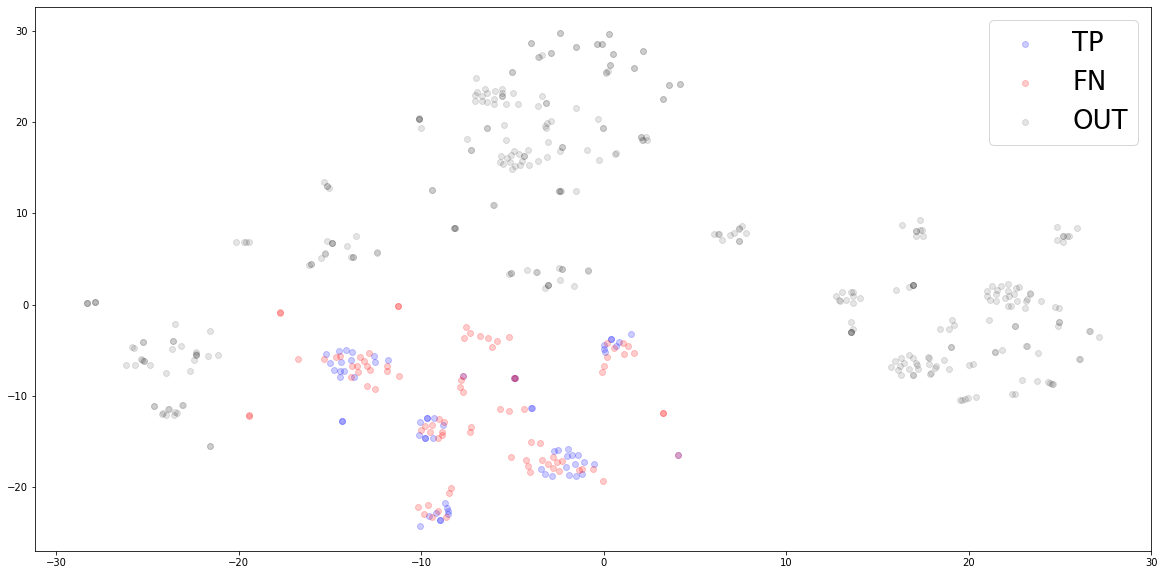

('left', 0, ('nucleotide', 'is_dummy')) 1.0
('left', 0, ('secondary_structure', 'BC')) 0.0
('left', 0, ('secondary_structure', 'BI')) 0.0
('left', 0, ('secondary_structure', 'BP')) 0.0
('left', 0, ('secondary_structure', 'HC')) 0.0
('left', 0, ('secondary_structure', 'HI')) 0.0
('left', 0, ('secondary_structure', 'HP')) 0.015384615384615385
('left', 0, ('secondary_structure', 'IC')) 1.0
('left', 0, ('secondary_structure', 'II')) 0.0
('left', 0, ('secondary_structure', 'IP')) 0.0
('left', 0, ('secondary_structure', 'JC')) 0.0
('left', 0, ('secondary_structure', 'JI')) 0.0
('left', 0, ('secondary_structure', 'JP')) 0.0
('left', 0, ('secondary_structure', 'S')) 0.0
('left', 0, ('base', 'a')) 0.5230769230769231
('left', 0, ('base', 'u')) 0.26153846153846155
('left', 0, ('base', 'g')) 0.06153846153846154
('left', 0, ('base', 'c')) 0.13846153846153847
('left', 0, ('base', 'rare')) 0.9846153846153847
('left', 0, ('fragment', 'length')) 4.461538461538462
('left', 0, ('fragment', 'index')) 1.64

In [22]:
examine_square('tHW', 0, -100, -20, 5)

In [30]:
conditions.append((
    'tHW AU same-IC', 
    lambda f: \
        (f[:, dm[('relation', 'SM')]] == 1) & \
        (f[:, dm[('right', 0, ('secondary_structure', 'HC'))]] == 1) & \
        (f[:, dm[('left', 0, ('secondary_structure', 'HC'))]] == 1) & \
        ((f[:, dm[('left', 0, ('base', 'a'))]] == 1) & (f[:, dm[('right', 0, ('base', 'u'))]] == 1) | \
         (f[:, dm[('left', 0, ('base', 'u'))]] == 1) & (f[:, dm[('right', 0, ('base', 'a'))]] == 1))
))

Теперь пытаемся полученное классифицировать

In [31]:
conditions

[('tHS AG same-HC', <function __main__.<lambda>(f)>),
 ('tHS AG same-IC', <function __main__.<lambda>(f)>),
 ('tHS AG same-JC', <function __main__.<lambda>(f)>),
 ('cWW UU/CG same-HC', <function __main__.<lambda>(f)>),
 ('cWW same-IC', <function __main__.<lambda>(f)>),
 ('tHW AU same-HC', <function __main__.<lambda>(f)>),
 ('tHW AU same-IC', <function __main__.<lambda>(f)>)]

In [32]:
DATASET_DIR = '/home/mikhail/bioinformatics/data/dataset_all_60'
FEATURES_PATH = os.path.join(DATASET_DIR, 'features.npy')
TARGET_PATH = os.path.join(DATASET_DIR, 'target.npy')
GROUPS_PATH = os.path.join(DATASET_DIR, 'groups.npy')
FEATURES_SHAPE = (6830702, 465)

In [33]:
def load_features():
    features = np.memmap(FEATURES_PATH, shape=FEATURES_SHAPE)
    target = np.load(TARGET_PATH)
    pdb_ids = np.load(GROUPS_PATH)
    
    return features, target, pdb_ids

In [34]:
def get_batch(index):
    with open(os.path.join(DATASET_DIR, 'batch_{}'.format(index)), 'rb') as infile:
        return dill.load(infile)
    

def get_data():
    return chain.from_iterable((get_batch(i) for i in tqdm(range(30))))

In [35]:
chain_ids = ['{}.cif1_{}'.format(sample.meta.pdb_id, sample.meta.pair.nt_left.chain_id) 
             for sample in get_data()]

100%|██████████| 30/30 [01:26<00:00,  2.89s/it]


In [36]:
with open('/home/mikhail/bioinformatics/data/nonredundant.txt', 'r') as infile:
    nonredundant_chain_ids = infile.read().splitlines()

In [37]:
nonredundant_mask = np.repeat([chain_id in nonredundant_chain_ids for chain_id in chain_ids], 2)

In [38]:
features, target, pdb_ids = load_features()

In [39]:
mask = (target != 0) & nonredundant_mask 

features = features[mask]
target = target[mask] == 1
pdb_ids = pdb_ids[mask]

In [44]:
def try_condition(condition_description, condition):
    print('\n\n\nTRYING "{}"\n\n\n'.format(condition_description))
    
    condition_mask = condition(features)

    condition_features = features[condition_mask]
    condition_pdb_ids = pdb_ids[condition_mask]
    condition_target = target[condition_mask]
    print('all for condition:', condition_target.shape[0], 'noncanonical:', np.sum(condition_target), '\n\n')
    
    group_kfold = GroupKFold(n_splits=5)
    group_kfold.get_n_splits(condition_features, condition_target, condition_pdb_ids)

    feature_importances = []
    target_pred = np.zeros_like(condition_target)
    pred_proba = np.zeros_like(condition_target, dtype=np.float32)

    for train_index, test_index in group_kfold.split(condition_features, condition_target, condition_pdb_ids):
        X_train, X_test = condition_features[train_index], condition_features[test_index]
        y_train, y_test = condition_target[train_index], condition_target[test_index]
        print('Train positive rate: {}, test positive rate: {}'.format(
            np.mean(y_train == 1), np.mean(y_test == 1)))

        model = RandomForestClassifier(class_weight='balanced', n_estimators=100, n_jobs=8)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        feature_importances.append(model.feature_importances_)
        target_pred[test_index] = y_pred
        pred_proba[test_index] = model.predict_proba(X_test)[:, 1]

        print(precision_recall_fscore_support(y_test, y_pred))

    plt.figure(figsize=(20, 10))

    plot_precision_recall_curve(ClassificationResult(
        target=condition_target, 
        predicted=target_pred, 
        predicted_proba=pred_proba));
    plt.show()




TRYING "tHS AG same-HC"



all for condition: 3822 noncanonical: 198 


Train positive rate: 0.13480885311871227, test positive rate: 0.02263083451202263
(array([0.98784846, 1.        ]), array([1.     , 0.46875]), array([0.99388709, 0.63829787]), array([2764,   64]))
Train positive rate: 0.0389030612244898, test positive rate: 0.11078717201166181
(array([0.95921697, 0.69863014]), array([0.96393443, 0.67105263]), array([0.96156991, 0.68456376]), array([610,  76]))
Train positive rate: 0.04838709677419355, test positive rate: 0.17647058823529413
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([84, 18]))
Train positive rate: 0.047337278106508875, test positive rate: 0.21153846153846154
(array([0.89130435, 1.        ]), array([1.        , 0.54545455]), array([0.94252874, 0.70588235]), array([82, 22]))
Train positive rate: 0.04838709677419355, test positive rate: 0.17647058823529413
(array([0.97674419, 1.        ]), array([1.        , 0.88888889]), array([0.98823529, 0.9411764

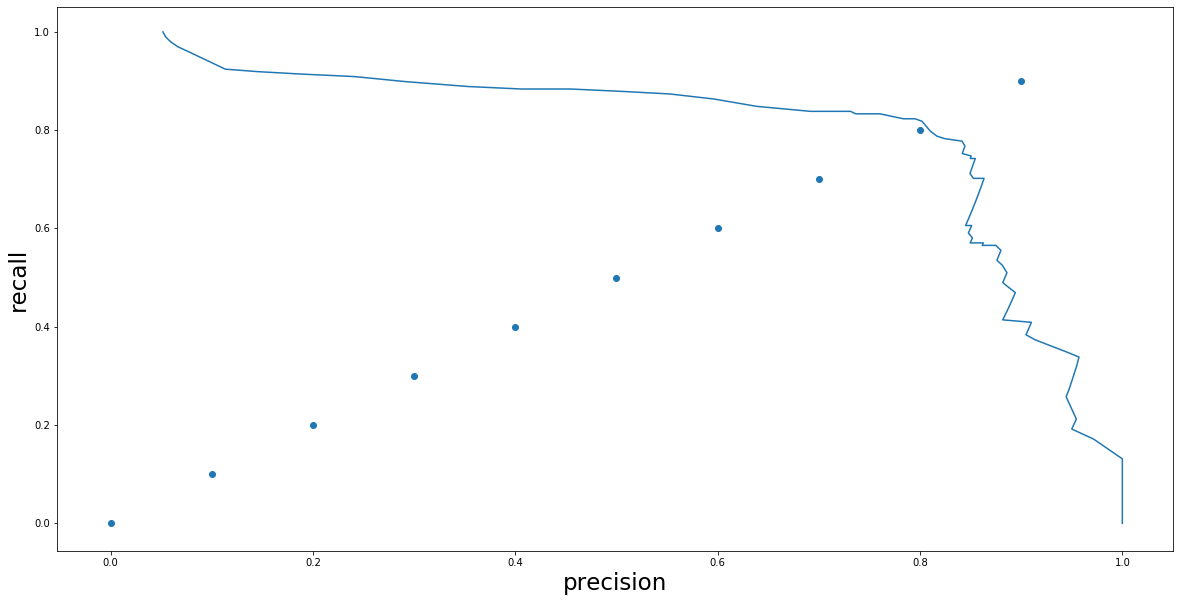




TRYING "tHS AG same-IC"



all for condition: 2774 noncanonical: 260 


Train positive rate: 0.1003671970624235, test positive rate: 0.08421052631578947
(array([0.92144748, 1.        ]), array([1.        , 0.07291667]), array([0.95911805, 0.13592233]), array([1044,   96]))
Train positive rate: 0.08614668218859138, test positive rate: 0.10606060606060606
(array([0.8981922, 1.       ]), array([1.        , 0.04464286]), array([0.94636591, 0.08547009]), array([944, 112]))
Train positive rate: 0.09302325581395349, test positive rate: 0.10309278350515463
(array([0.90625, 1.     ]), array([1. , 0.1]), array([0.95081967, 0.18181818]), array([174,  20]))
Train positive rate: 0.09759876065065841, test positive rate: 0.041666666666666664


/home/mikhail/venv/f723/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([0.95833333, 0.        ]), array([1., 0.]), array([0.9787234, 0.       ]), array([184,   8]))
Train positive rate: 0.09140201394268009, test positive rate: 0.125


/home/mikhail/venv/f723/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([0.875, 0.   ]), array([1., 0.]), array([0.93333333, 0.        ]), array([168,  24]))
precision_recall_fscore_support


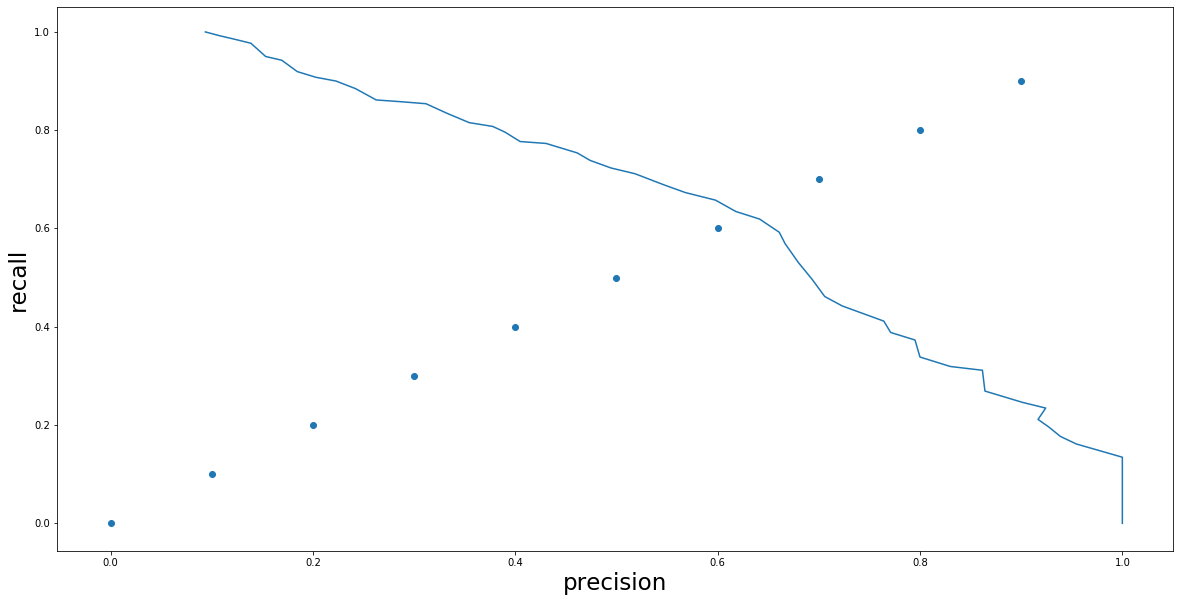




TRYING "tHS AG same-JC"



all for condition: 4816 noncanonical: 206 


Train positive rate: 0.05627705627705628, test positive rate: 0.030327214684756583
(array([0.97122302, 1.        ]), array([1.        , 0.05263158]), array([0.98540146, 0.1       ]), array([2430,   76]))
Train positive rate: 0.03905160390516039, test positive rate: 0.048254620123203286
(array([0.9537037, 1.       ]), array([1.        , 0.04255319]), array([0.97630332, 0.08163265]), array([1854,   94]))
Train positive rate: 0.04236200256739409, test positive rate: 0.056338028169014086


/home/mikhail/venv/f723/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([0.94366197, 0.        ]), array([1., 0.]), array([0.97101449, 0.        ]), array([134,   8]))
Train positive rate: 0.04122396940076498, test positive rate: 0.10909090909090909


/home/mikhail/venv/f723/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([0.89090909, 0.        ]), array([1., 0.]), array([0.94230769, 0.        ]), array([98, 12]))
Train positive rate: 0.04037399065023375, test positive rate: 0.14545454545454545


/home/mikhail/venv/f723/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([0.85454545, 0.        ]), array([1., 0.]), array([0.92156863, 0.        ]), array([94, 16]))
precision_recall_fscore_support


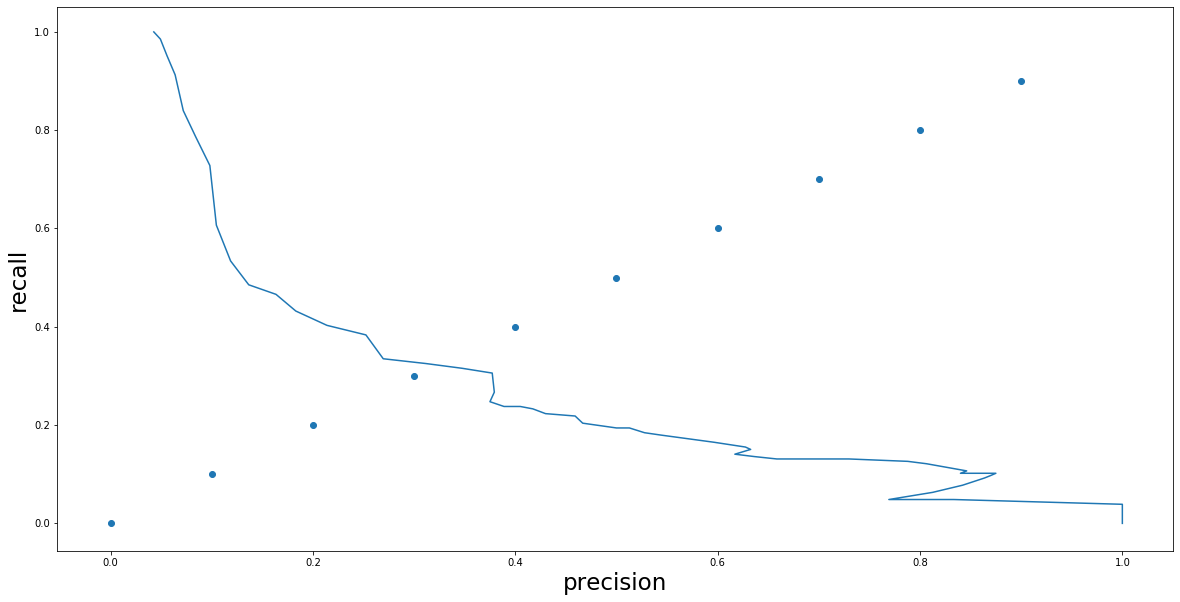




TRYING "cWW UU/CG same-HC"



all for condition: 7612 noncanonical: 134 


Train positive rate: 0.03494623655913978, test positive rate: 0.0157251019219569
(array([0.98456161, 1.        ]), array([1.        , 0.01851852]), array([0.99222075, 0.03636364]), array([6760,  108]))
Train positive rate: 0.01642129105322763, test positive rate: 0.032846715328467155
(array([0.97069597, 1.        ]), array([1.        , 0.11111111]), array([0.98513011, 0.2       ]), array([530,  18]))
Train positive rate: 0.016962629207527165, test positive rate: 0.09090909090909091


/home/mikhail/venv/f723/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([0.90909091, 0.        ]), array([1., 0.]), array([0.95238095, 0.        ]), array([60,  6]))
Train positive rate: 0.01749271137026239, test positive rate: 0.030303030303030304


/home/mikhail/venv/f723/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([0.96969697, 0.        ]), array([1., 0.]), array([0.98461538, 0.        ]), array([64,  2]))
Train positive rate: 0.01775304716481187, test positive rate: 0.0
(array([1.]), array([1.]), array([1.]), array([64]))
precision_recall_fscore_support


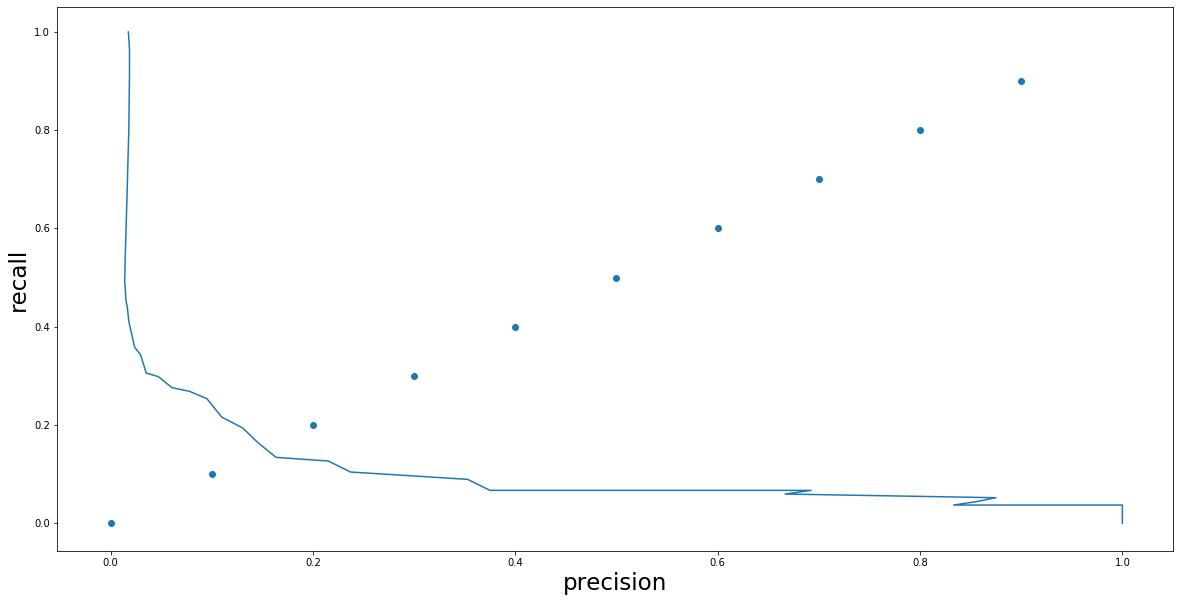




TRYING "cWW same-IC"



all for condition: 14992 noncanonical: 892 


Train positive rate: 0.07622899813316739, test positive rate: 0.046940681924334426
(array([0.95472095, 0.88235294]), array([0.99975496, 0.03731343]), array([0.97671913, 0.07159905]), array([8162,  402]))
Train positive rate: 0.0543378154356235, test positive rate: 0.07305273343009192
(array([0.92919496, 1.        ]), array([1.        , 0.03311258]), array([0.96329814, 0.06410256]), array([3832,  302]))
Train positive rate: 0.06046119235095613, test positive rate: 0.041666666666666664
(array([0.96083551, 1.        ]), array([1.    , 0.0625]), array([0.98002663, 0.11764706]), array([736,  32]))
Train positive rate: 0.05748418833450457, test positive rate: 0.09711286089238845
(array([0.90885073, 1.        ]), array([1.        , 0.06756757]), array([0.95224913, 0.12658228]), array([688,  74]))
Train positive rate: 0.05692999718864211, test positive rate: 0.10732984293193717
(array([0.9009247, 1.       ]), array([1.   

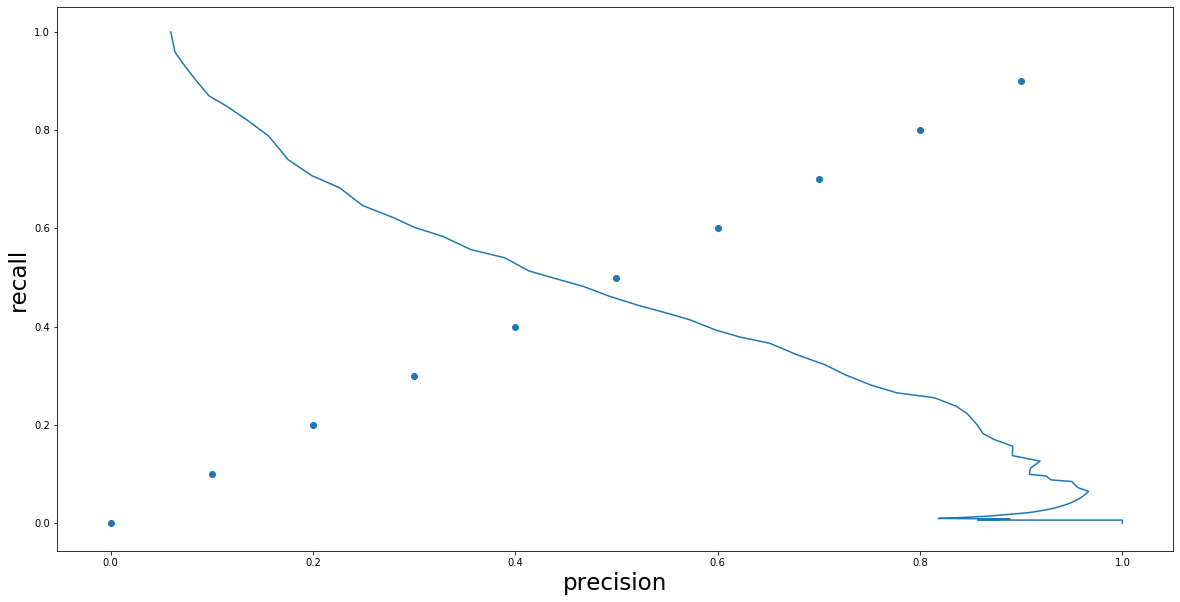




TRYING "tHW AU same-HC"



all for condition: 2178 noncanonical: 112 


Train positive rate: 0.0847457627118644, test positive rate: 0.03537414965986395
(array([0.9665985, 1.       ]), array([1.        , 0.05769231]), array([0.9830156 , 0.10909091]), array([1418,   52]))
Train positive rate: 0.04287369640787949, test positive rate: 0.084070796460177
(array([0.922049, 1.      ]), array([1.        , 0.07894737]), array([0.9594438 , 0.14634146]), array([414,  38]))
Train positive rate: 0.05066921606118547, test positive rate: 0.06976744186046512
(array([0.96385542, 1.        ]), array([1. , 0.5]), array([0.98159509, 0.66666667]), array([80,  6]))
Train positive rate: 0.05162523900573614, test positive rate: 0.046511627906976744


/home/mikhail/venv/f723/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([0.95348837, 0.        ]), array([1., 0.]), array([0.97619048, 0.        ]), array([82,  4]))
Train positive rate: 0.04775549188156638, test positive rate: 0.14285714285714285
(array([0.87804878, 1.        ]), array([1.        , 0.16666667]), array([0.93506494, 0.28571429]), array([72, 12]))
precision_recall_fscore_support


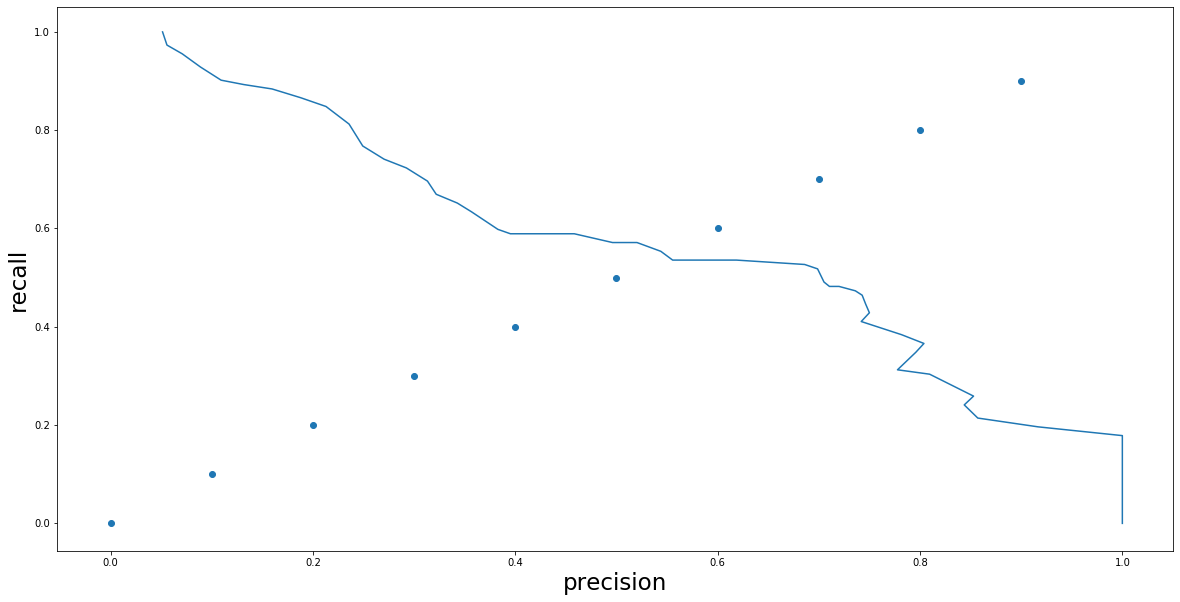




TRYING "tHW AU same-IC"



all for condition: 2178 noncanonical: 112 


Train positive rate: 0.0847457627118644, test positive rate: 0.03537414965986395
(array([0.9665985, 1.       ]), array([1.        , 0.05769231]), array([0.9830156 , 0.10909091]), array([1418,   52]))
Train positive rate: 0.04287369640787949, test positive rate: 0.084070796460177
(array([0.91796009, 1.        ]), array([1.        , 0.02631579]), array([0.95722543, 0.05128205]), array([414,  38]))
Train positive rate: 0.05066921606118547, test positive rate: 0.06976744186046512
(array([0.96385542, 1.        ]), array([1. , 0.5]), array([0.98159509, 0.66666667]), array([80,  6]))
Train positive rate: 0.05162523900573614, test positive rate: 0.046511627906976744
(array([0.96470588, 1.        ]), array([1.  , 0.25]), array([0.98203593, 0.4       ]), array([82,  4]))
Train positive rate: 0.04775549188156638, test positive rate: 0.14285714285714285
(array([0.88888889, 1.        ]), array([1.  , 0.25]), array([0.9411764

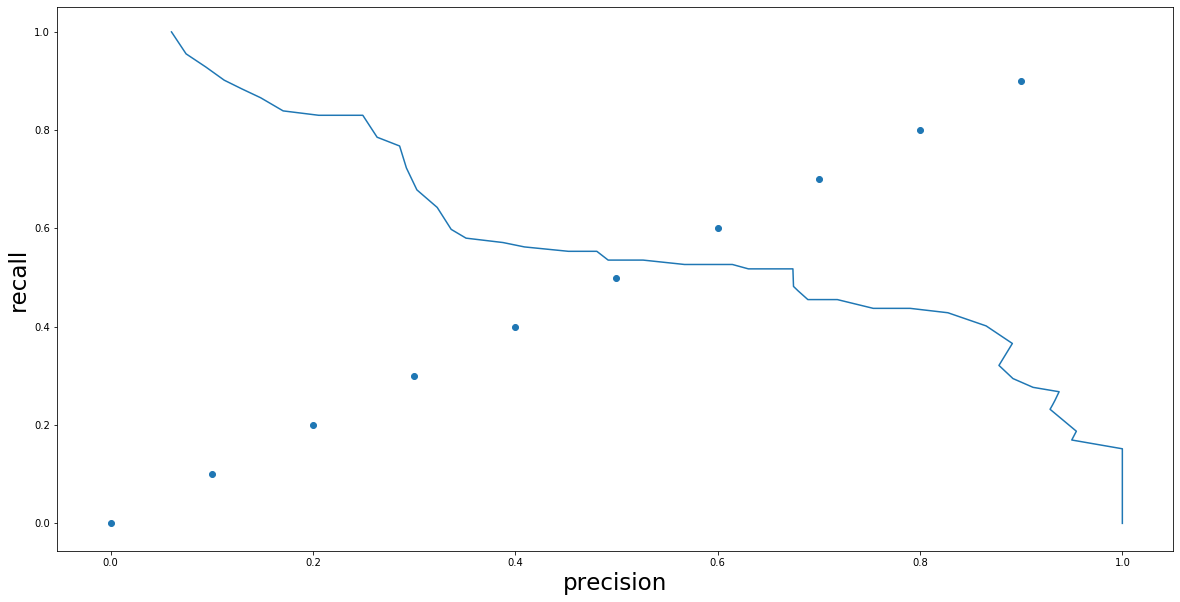

In [45]:
for condition in conditions:
    try_condition(*condition)

Результаты классификации коррелируют со "степенью смешения" красных и синих точек на картинках tSNE фичей. Также они коррелируют с отношением true_positive/false_negative в разбивке по классам Леонтиса, то есть для tHS -- гораздо лучше среднего, для tHW -- немного лучше, для cWW -- совсем не очень.